По мотивам $\S$4-5 главы 15 "Наглядной математической статистики" 

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
plt.style.use('seaborn')

Коррелированы только _соседние_ элементы случайного вектора:

In [9]:
# возвращает ковариационную матрицу случайного вектора с коррелированными соседями
def cov(n, ro):
    for_diag = np.ones(n - 1) * ro
    return np.eye(n) + np.diag(for_diag, -1) + np.diag(for_diag, 1)

In [12]:
cov(5, 0.4)

array([[1. , 0.4, 0. , 0. , 0. ],
       [0.4, 1. , 0.4, 0. , 0. ],
       [0. , 0.4, 1. , 0.4, 0. ],
       [0. , 0. , 0.4, 1. , 0.4],
       [0. , 0. , 0. , 0.4, 1. ]])

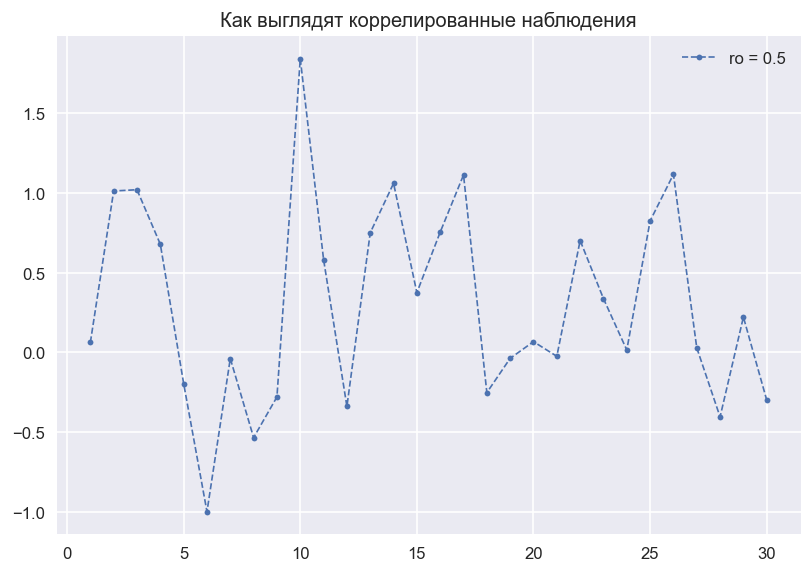

In [17]:
np.random.seed(764)
n = 30
ro = 0.5
plt.figure(dpi=120)

x = np.random.multivariate_normal(mean=np.zeros(n), cov=cov(n, ro))
plt.plot(np.arange(n) + 1, x, '.--', lw=1, label='ro = {}'.format(ro))

plt.title('Как выглядят коррелированные наблюдения')
plt.legend();

$\sqrt{n}\overline{X} \sim N(0, 1 + 2\rho \frac{n-1}{n})$, где $\rho$ - коэффициент корреляции.

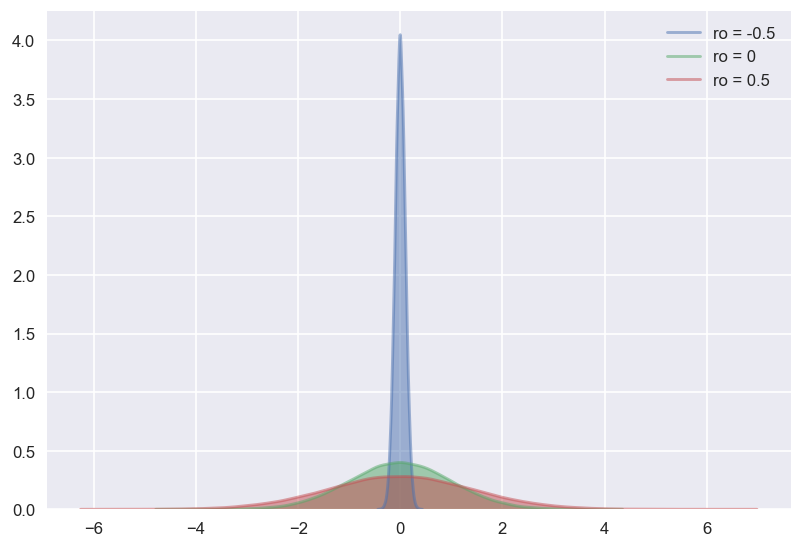

In [22]:
n = 100
plt.figure(dpi=120)

for ro in [-0.5, 0, 0.5]:
    z = np.random.multivariate_normal(
            np.zeros(n), 
            cov(n, ro), 
            size=100000  # число выборок
    ).mean(axis=1) * np.sqrt(n)

    sns.kdeplot(z, label='ro = {}'.format(ro), 
                alpha=0.5, shade=True)
plt.legend();

Интуиция:

**Положительная** корреляция: большие по модулю значения случайных величин "подтягивают" за собой следующие. Если случайная величина выпала большой по модулю, это также увеличивает шансы того, что и следующая будет такой же. Поэтому дисперсия растет.

**Отрицательная** корреляция: большие по модулю значения случайных величин увеличивают шансы, что следующая случайная величина будет иметь противоположный знак, что уменьшает дисперсию среднего.

## Критерий серий для обнаружения корреляций

In [266]:
#коррелированная выборка
ro = 0.1
n = 100
z = np.random.multivariate_normal(np.zeros(n), cov(n, ro))
h = np.median(z) #уровень
dzeta = np.array(z > h, dtype=int)
dzeta[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [268]:
delta = np.abs(dzeta[1:] - dzeta[:-1])
delta[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [269]:
t = 1 + np.sum(delta)
t  # статистика критерия

39

In [257]:
#нормальное приближение
def test(x):
    h = np.median(x)
    dzeta = np.array(x > h, dtype=int)
    m = np.sum(dzeta)
    delta = np.abs(dzeta[1:] - dzeta[:-1])
    t = 1 + np.sum(delta)
    n = len(x)
    l = n - m
    mu = 1 + 2 * l * m / n
    sigma = np.sqrt(2 * l * m * (2 * l * m - n) / (n ** 2 * (n - 1)))
    z = (t - mu) / sigma
    print('Значение статистики:', round(z, 3))
    print('Уровень значимости (односторонняя гипотеза):', 
          np.min([norm.cdf(z), 1 - norm.cdf(z)]).round(3))

In [267]:
test(z)

Значение статистики: -2.412
Уровень значимости (односторонняя гипотеза): 0.008
